In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
N = 1000
fist = pd.read_csv('/Users/egor/Documents/University/Senior Project/myo-recorder/fist_1000.csv').values[:N] # 0
left = pd.read_csv('/Users/egor/Documents/University/Senior Project/myo-recorder/left_1000.csv').values[:N] # 1
right = pd.read_csv('/Users/egor/Documents/University/Senior Project/myo-recorder/right_1000.csv').values[:N] # 2
spread = pd.read_csv('/Users/egor/Documents/University/Senior Project/myo-recorder/spread_1000.csv').values[:N] # 3
labels = {0: "fist", 1: "left", 2: "right", 3: "spread"}

In [181]:
# def abs_filter(emg, size=5):
#     emg = np.abs(emg)
#     rows = int(len(emg) / size)
#     cols = 8
#     result = np.zeros((rows, cols))
#     for i in range(8):
#         channel = np.array_split(emg[:, i], rows)
#         result[:, i] = [np.mean(l) for l in channel]
#     return result
# def plot(emg, name):
#     plt.figure(figsize=(8,5))
#     plt.title(name + " EMG")
#     plt.ylabel("Sensor value")
#     plt.xlabel("Timestamps")
#     for i, channel in enumerate(emg.T):
#         plt.plot(channel, label="Channel %i" % (i+1))
#     plt.legend(loc='upper right')
#     plt.savefig("emg_" + name + ".png")
#     plt.show()
# plot(left[:100], "Raw")
from scipy import stats
x = np.concatenate((left, right, fist, spread))
k2, p = stats.normaltest(right)
alpha = 1e-3
print(p)

for i in p:
    if i < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

[2.90945715e-10 3.94278003e-07 1.44209141e-05 6.74566254e-06
 1.85866937e-16 1.43182328e-14 5.14140857e-14 1.34463252e-45]
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected


In [177]:
np.random.seed(28041990)
a = np.random.normal(0, 1, size=pts)
b = np.random.normal(2, 1, size=pts)
x = [0, 1,2,3,4,3,2,1,0]
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.735132
The null hypothesis cannot be rejected


/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [157]:
def abs_filter(emg, size=10):
    emg = np.abs(emg)
    rows = int(len(emg) / size)
    cols = 8
    result = np.zeros((rows, cols))
    for i in range(8):
        channel = np.array_split(emg[:, i], rows)
        result[:, i] = [np.mean(l) for l in channel]
    return result
fist = abs_filter(fist)
left = abs_filter(left)
right = abs_filter(right)
spread = abs_filter(spread)

In [158]:
X = np.copy(fist)
for index, gesture in enumerate([left, right, spread]):
    X = np.append(X, gesture, axis=0)

In [159]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# scaler = StandardScaler()
pca = PCA(n_components=3)

# X = scaler.fit_transform(X)

pca_result = pca.fit_transform(X)
print pca.explained_variance_ratio_
print pca.components_
print pca.singular_values_

[0.5738618  0.23624263 0.08338575]
[[-0.30264254 -0.01852161  0.20528027  0.86465536  0.2249078  -0.10724181
  -0.0581832  -0.22983896]
 [ 0.1999026   0.11020565  0.30670809  0.22347056  0.07652242  0.67646264
   0.15302455  0.56303715]
 [-0.39921581 -0.24715787 -0.44625889 -0.08045675  0.31130169  0.35829553
   0.56780604 -0.16196084]]
[418.50863426 268.5220155  159.53158137]


In [160]:
number_classes = 4
number_items = len(pca_result) / number_classes
classes = np.array_split(pca_result, number_classes)

In [161]:
# Rejecting outliers
from scipy import stats

threshhold = 3.0
classes_cleaned = [None] * number_classes
for index, gesture in enumerate(classes):
    z = np.abs(stats.zscore(gesture))
    rows = list(set(np.where(z > threshhold)[0]))
    classes_cleaned[index] = np.delete(gesture, rows, 0)
    

<IPython.core.display.Javascript object>


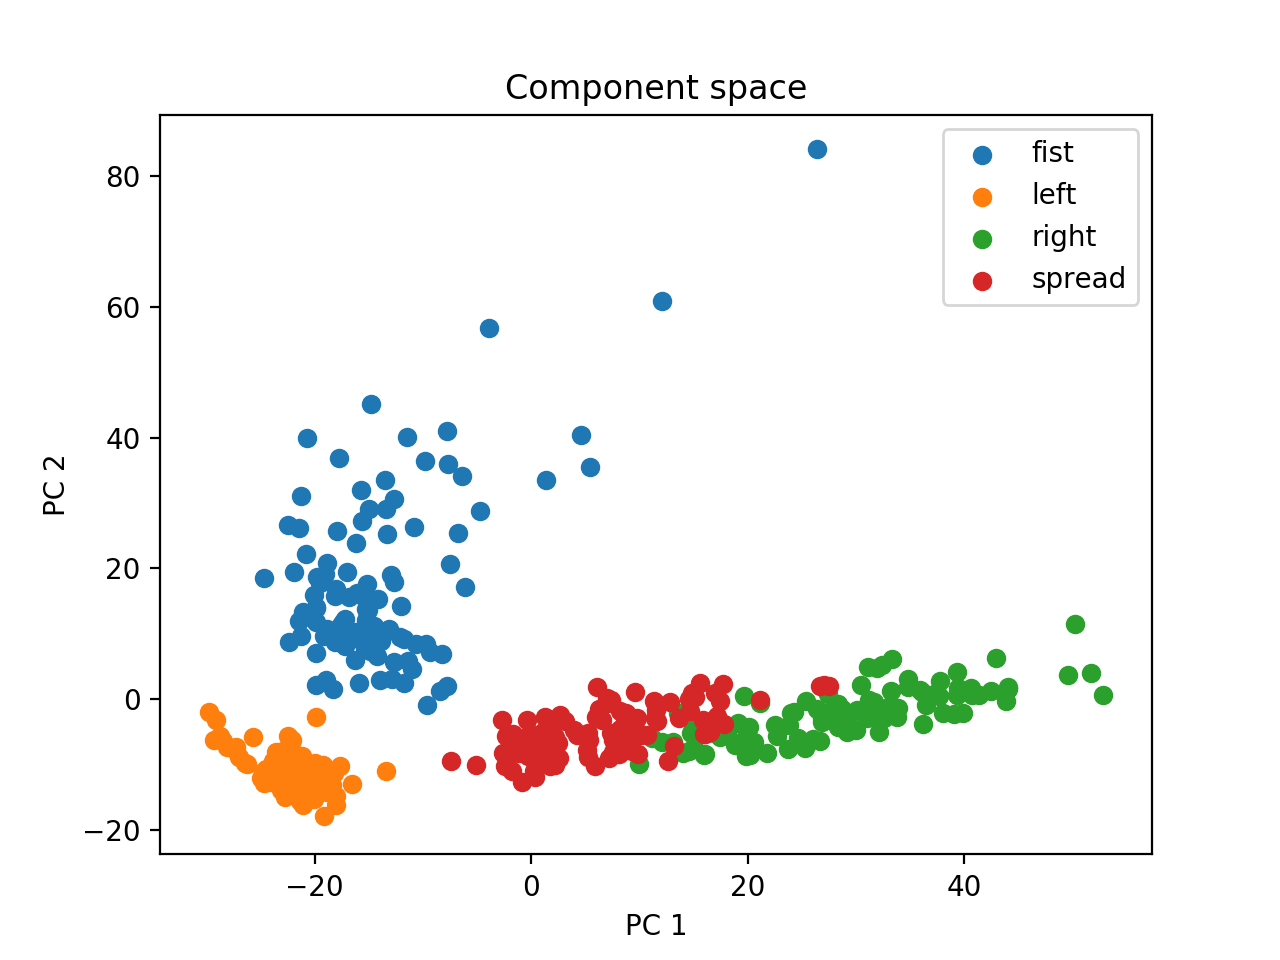

In [162]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111)

for index, gesture in enumerate(classes): 
    ax.scatter(gesture[:,0], gesture[:, 1], label=labels[index])
    
ax.legend()
plt.title("Component space")
plt.ylabel("PC 2")
plt.xlabel("PC 1")

plt.savefig("pca_plot2d.png")
plt.show()


<IPython.core.display.Javascript object>


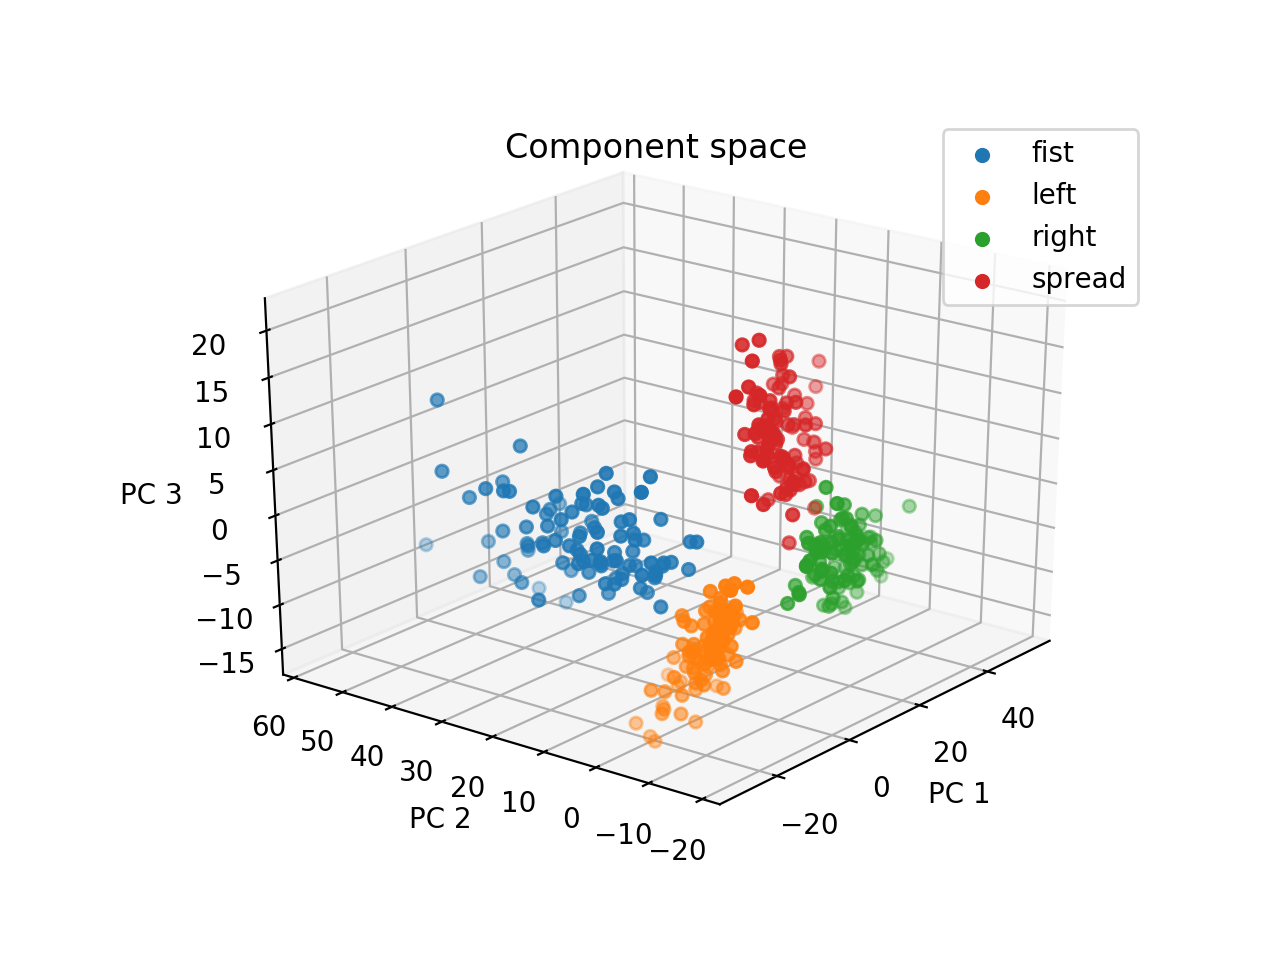

In [164]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for index, gesture in enumerate(classes_cleaned): 
    ax.scatter(gesture[:,0], gesture[:, 1], gesture[:, 2], label=labels[index])
ax.legend()
plt.title("Component space")
plt.ylabel("PC 2")
plt.xlabel("PC 1")
ax.set_zlabel("PC 3")

plt.savefig("pca_plot3d.png")
plt.show()